In [15]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

Here we consider a model for the motion of a sphere in fluid. This based on the lecture notes for [Lecture 1 of MIT 2.29 Numerical Fluid Mechanics](https://ocw.mit.edu/courses/mechanical-engineering/2-29-numerical-fluid-mechanics-spring-2015/lecture-notes-and-references/).

**2nd order DE**
$$M\frac{d^2x}{dt^2} = \frac{1}{2}\rho C_d \pi R^2\left(V - \frac{dx}{dt}\right)^2$$

**1st order DE system**
$$u = \frac{dx}{dt}$$
$$\frac{du}{dt} = \frac{M}{2}\rho C_d \pi R^2\left(V - 2uV + u^2\right)$$


**Taylor expansion**

$$u_{t + 1} = u\left(t + \Delta t\right) \sim u(t) + \frac{du(t)}{dt} \Delta t = u_t + \frac{du_t}{dt} \Delta t$$

**Updates in Euler's method**

$$x_{t + 1} = x_t + \frac{dx_t}{dt} \Delta t = x_t + u_t \Delta t$$

Here we replicate the original Matlab model in Python. We compare the "true" solution obtained from a differential equation solver with the simple approach of Euler's method and find that the error drops for velocity and increases for position.

In [16]:
v=1
rho = 1000
Cd = 1
m=5
r=0.05
fac=rho*Cd*np.pi*r**2/(2*m)

In [17]:
def dudt(t, u):
    f = np.zeros([2])
    f[0] = fac * (v**2 - 2*v*u[0] + u[0]**2)
    f[1] = u[0]
    return f

In [18]:
def euler(x0=0, u0=0, h=1, N=10, f=None):
    if f == None:
      f = fac
    velocity = np.zeros(N + 1,)
    position = np.zeros(N + 1,)

    # Initial conditions
    velocity[0] = u0
    position[0] = x0

    for n in range(1, N + 1):
        velocity[n] = velocity[n - 1] + h * f * (
            v**2 - 2 * v * velocity[n - 1] + velocity[n - 1] ** 2)
        position[n] = position[n - 1] + h * velocity[n - 1]  

    return velocity, position

In [46]:
def sph_drag():

    # Euler's method
    h = 1.
    t = np.linspace(0, 10, int(10 / h) + 1)
    N = len(t)
    u_e = np.zeros(N,)
    x_e = np.zeros(N,)

    # Initial conditions
    u_e[0] = 0
    x_e[0] = 0

    for n in range(1, N):
        u_e[n] = u_e[n - 1] + h * fac * (
            v**2 - 2 * v * u_e[n - 1] + u_e[n - 1] ** 2)
        x_e[n] = x_e[n - 1] + h * u_e[n - 1]
    
    
    # Runge-Kutta
    u0 = np.zeros([2])
    result = integrate.solve_ivp(fun=dudt,
                                 t_span=[t[0],max(t)], 
                                 y0=u0, method='RK45')
    tt = result.t
    _u = result.y
    u = np.array([np.interp(t, tt, i) for i in _u])
    
    plt.figure(figsize=(12, 8))
    plt.plot(t, u_e, '+b', label="Euler's method", markersize=10)
    plt.plot(t, u[0], '.', color='lightgreen', label="Exact", markersize=15, linewidth=2)
    plt.plot(t, np.abs(u[0] - u_e), '+r', label="Error", markersize=10)
    plt.legend(fontsize=14, loc='right');
    plt.xlim([0, max(t)]);
    plt.ylim([0, max(max(u_e), max(u[0])) + 0.1]);
    plt.ylabel("u (m/s)", fontsize=14)
    plt.xlabel("Time (s)", fontsize=14)
    plt.title("Velocity of Sphere in Flow - $\Delta t = 1$", fontsize=16)
      
    plt.figure(figsize=(12, 8))
    plt.plot(t, x_e, '+b', label="Euler's method", markersize=10, linewidth=2)
    plt.plot(t, u[1], '.',color='lightgreen',label="Exact", markersize=15)
    plt.plot(t, np.abs(u[1] - x_e), 'xr',label= "Error", markersize=10)
    plt.legend(fontsize=14, loc='upper left');
    plt.xlim([0, max(t)]);
    plt.ylim([0, max(max(x_e), max(u[1])) + 0.2]);
    plt.ylabel("x (m)", fontsize=16)
    plt.xlabel("Time (s)", fontsize=16)
    plt.title("Position of Sphere in Flow - $\Delta t = 1$", fontsize=16)

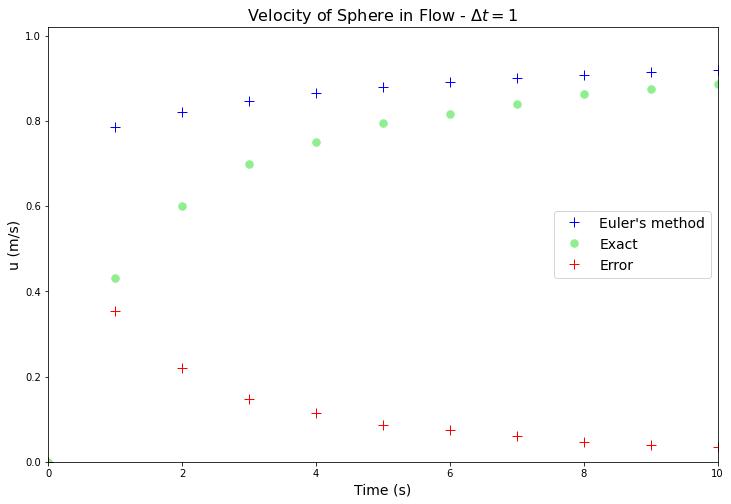

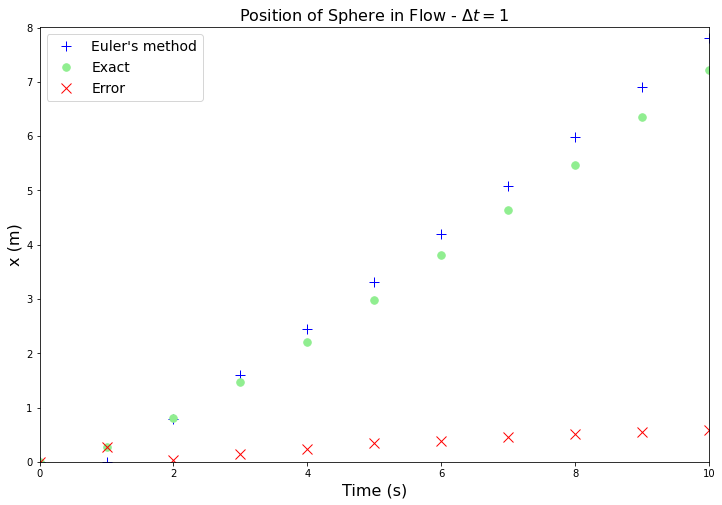

In [47]:
sph_drag()